####  Energy Consumption For Appliances 

                                                      Dataset Description

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Attribute Information:

There are 29 features to describe appliances energy use:

1. date : time year-month-day hour:minute:second

2. lights : energy use of light fixtures in the house in Wh

3. T1 : Temperature in kitchen area, in Celsius

4. T2 : Temperature in living room area, in Celsius

5. T3 : Temperature in laundry room area

6. T4 : Temperature in office room, in Celsius

7. T5 : Temperature in bathroom, in Celsius

8. T6 : Temperature outside the building (north side), in Celsius

9. T7 : Temperature in ironing room, in Celsius

10. T8 : Temperature in teenager room 2, in Celsius

11. T9 : Temperature in parents’ room, in Celsius

12. T_out : Temperature outside (from Chievres weather station), in Celsius

13. Tdewpoint : (from Chievres weather station), Â°C

14. RH_1 : Humidity in kitchen area, in %

15. RH_2 : Humidity in living room area, in %

16. RH_3 : Humidity in laundry room area, in %

17. RH_4 : Humidity in office room, in %

18. RH_5 : Humidity in bathroom, in %

19. RH_6 : Humidity outside the building (north side), in %

20. RH_7 : Humidity in ironing room, in %

21. RH_8 : Humidity in teenager room 2, in %

22. RH_9 : Humidity in parents’ room, in %

23. RH_out :Humidity outside (from Chievres weather station), in %

24. Pressure : (from Chievres weather station), in mm Hg

25. Wind speed: (from Chievres weather station), in m/s

26. Visibility :(from Chievres weather station), in km

27. Rv1 :Random variable 1, non-dimensional

28. Rv2 :Random variable 2, non-dimensional

29. Appliances : Total energy used by appliances, in Wh

                                                            Introduction

In a world faced with lots of uncertainties, where the problem with energy scarcity is large especially with the less developing nations world, there is need to increase the quality of energy supplied and also increase the quantity to support economic and social progress and build a better quality of life. Today, there are many places especially in the less developing world where energy outages is experienced more intensly. This is as a result of excessive energy load placed and consumed by appliances. Appliance used at home or offices are energy consuming, what is means is that Heating and cooling appliances takes most power places much burden on the energy distribution, hence, predicting the Energy consumed by appliances shows insights and ways to utilize energy.

This Project howerver, will just be focused on answering some Questions regarding the Stage B QUIZ.

In [54]:
# importing required libaries
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [55]:
# reading the dataset 
energy_data = pd.read_csv('HDSC-Regression-Dataset\energydata_complete.csv')
energy_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [56]:
# checking  the size of the dataset
print("The Shape is: ", energy_data.shape)

The Shape is:  (19735, 29)


The dataset contains 19735 rows and 29 columns

In [57]:
# checking the column names
energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [58]:
# renaming columns
energy_data.columns = ['Date', 'Appliances', 'Lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_Out', 'Press_mm_hg', 'RH_out', 'Wind_Speed',
       'Visibility', 'Tdewpoint', 'Rv1', 'Rv2']

energy_data.head()

,Date,Appliances,Lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_Out,Press_mm_hg,RH_out,Wind_Speed,Visibility,Tdewpoint,Rv1,Rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [59]:
# checking through the data types
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   Lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Question 12. 

From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

<AxesSubplot:xlabel='T2', ylabel='T6'>

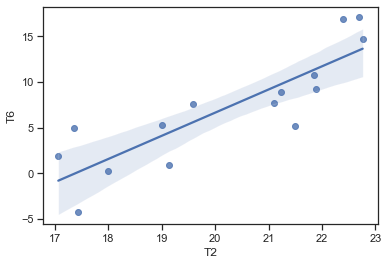

In [60]:
# selecting a sample for the dataset
simple_linear_reg_energy_data = energy_data [['T2', 'T6']].sample(15, random_state=2)

# regression plot
sns.regplot(x="T2", y="T6", data=simple_linear_reg_energy_data)

In [61]:
# the two data sets have similar data hence no need to scale the data set 
predictor = energy_data['T2']
target = energy_data['T6']

# splitting and testing into 70/30
x_test, x_train, y_test, y_train = train_test_split(predictor,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=1)

x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
model = LinearRegression()
model.fit(x_train, y_train)
predicted_value = model.predict(x_test)

predicted_value

array([24.28662527,  4.21170699,  6.7991409 , ...,  5.99614417,
        6.07049572,  2.65032445])

In [62]:
# getting the value of R^2 
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_value)
round(r2_score, 2)

0.64

                                                       Inferernce

The value of R^2 in two d.p is 0.64

Question 13

Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [63]:
# removing the date and lights column from the datasets
energy_data.drop(['Date', 'Lights'], axis=1, inplace=True)
energy_data

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_Out,Press_mm_hg,RH_out,Wind_Speed,Visibility,Tdewpoint,Rv1,Rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [64]:
# Normalising the dataset using the min-max scaler
from sklearn.preprocessing import MinMaxScaler # import the libary

scaler = MinMaxScaler()
normalised_data = pd.DataFrame(scaler.fit_transform(energy_data), columns=energy_data.columns)
heating_target = normalised_data['Appliances']

In [65]:
# Normalising the dataset using the min-max scaler
from sklearn.preprocessing import MinMaxScaler # importing libaries
scaler = MinMaxScaler()
normalised_data = pd.DataFrame(scaler.fit_transform(energy_data), columns=energy_data.columns)
# Segmenting  the features and target variables
features_data = normalised_data.drop(columns=['Appliances'])
heating_target = normalised_data['Appliances']

In [66]:
# Spliting our dataset into the training and testing dataset.
from sklearn.model_selection import train_test_split # import the libary
x_train, x_test, y_train, y_test = train_test_split(features_data, heating_target,
test_size=0.3, random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)

Mean Absolute Error

In [68]:
# Mean Absolute Error(MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.05

                                                          Inference 

The Mean Absolute Error(MAE) is 0.05

Question 14

What is the Residual Sum of Squares (in two decimal places)?

In [71]:
# Residual Sum of Squares(RSS)
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.34

                                                          Inference

The Residual Sum of Squares(RSS) is 45.34

Question 15

What is the Root Mean Squared Error (in three decimal places)?

In [73]:
# Root Mean Squared Error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.088

                                                             Inference 

The Root Mean Squared Error is 0.088

Question 16

What is the Coefficient of Determination (in two decimal places)?

In [76]:
# The Coefficient of Determination
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2) 

0.15

                                                             Inference 

The Coefficient of Determination is 0.15

Question 17

Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [97]:
#comparing the effects of regularisation
def get_weights_data(model, feat, col_name):

 #this function returns the weight of every feature
 weights = pd.Series(model.coef_, feat.columns).sort_values()
 weights_data = pd.DataFrame(weights).reset_index()
 weights_data.columns = ['Features', col_name]
 weights_data[col_name].round(3)
 return weights_data

 linear_model_weights = get_weights_data(linear_model, x_train,
                                      'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,Rv2,-2.219382e+11
1,RH_2,-4.567672e-01
2,T_Out,-3.219552e-01
3,T2,-2.361994e-01
4,T9,-1.899314e-01
5,RH_8,-1.576020e-01
6,RH_out,-7.768452e-02
7,RH_7,-4.455266e-02
8,RH_9,-3.980932e-02
9,T5,-1.566960e-02


                                                                Inference

The features that have the lowest and highest weights RH_2 and RH_1 respectively

Question 18
Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [48]:
# Ridge Regression 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [89]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

                                                               Inference

When evaluated on the test set, there is no change to the root mean squared error (RMSE) as they have the same value of 0.088

Question 19

Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [90]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
lasso_pred = lasso_reg.predict(x_test)

lasso_weights_data = get_weights_data(lasso_reg, x_train, 'Lasso_weight')
lasso_weights_data

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_Out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


                                                           Inference

The numbers of features with  non-zero feature weights is 4

Question 20

What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [91]:
# getting the new RMSE
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
round(rmse, 3)

0.094

                                                       Inference

The new RMSE with the lasso regression is 0.094